In [305]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
import warnings

warnings.filterwarnings('ignore')

In [306]:
data = pd.read_csv('sonar_data.csv')
data = pd.read_csv('sonar_data.csv',names = range(0,61),header = 0)



In [307]:
data = pd.DataFrame(data=data)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [308]:
# checking the datatypes
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [309]:
data.shape

(207, 61)

In [310]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [311]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       207 non-null    float64
 1   1       207 non-null    float64
 2   2       207 non-null    float64
 3   3       207 non-null    float64
 4   4       207 non-null    float64
 5   5       207 non-null    float64
 6   6       207 non-null    float64
 7   7       207 non-null    float64
 8   8       207 non-null    float64
 9   9       207 non-null    float64
 10  10      207 non-null    float64
 11  11      207 non-null    float64
 12  12      207 non-null    float64
 13  13      207 non-null    float64
 14  14      207 non-null    float64
 15  15      207 non-null    float64
 16  16      207 non-null    float64
 17  17      207 non-null    float64
 18  18      207 non-null    float64
 19  19      207 non-null    float64
 20  20      207 non-null    float64
 21  21      207 non-null    float64
 22  22

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007B98D98248>,
      dtype=object)

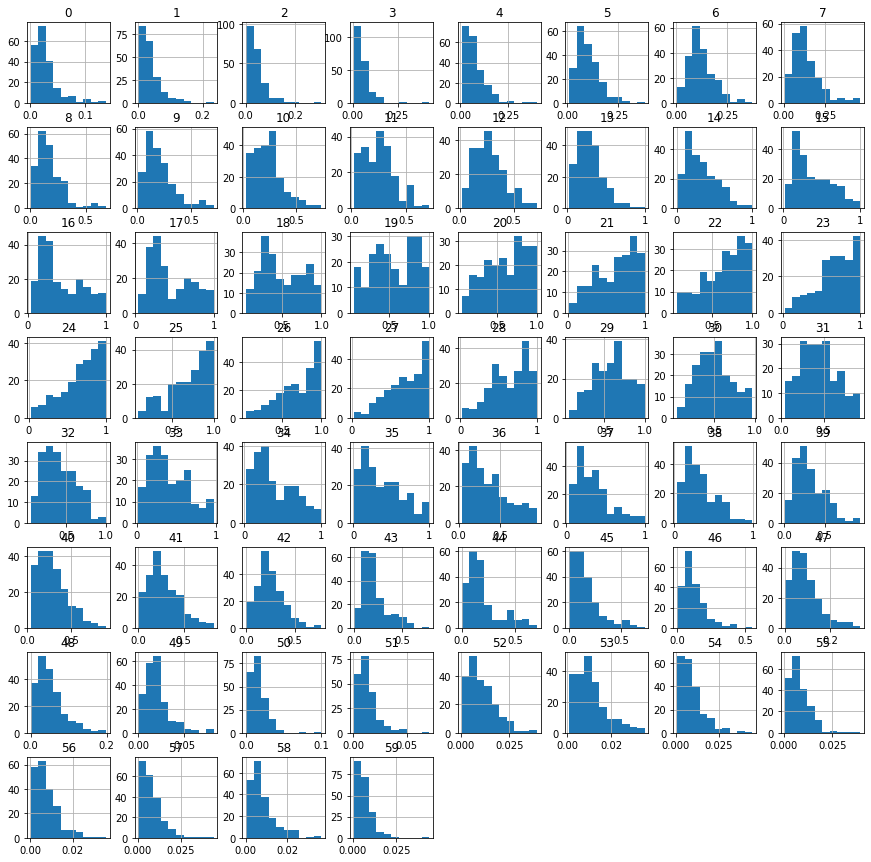

In [313]:
#sns.heatmap(data.corr(),annot = True)


data.hist(figsize = (15,15))

In [314]:
#sns.pairplot(data)

In [315]:
x = data.iloc[:,0:-1]
x


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [316]:
#ss = StandardScaler()
#x = ss.fit_transform(x)


In [317]:
#x

In [318]:
pca = PCA(n_components=10)
pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [319]:
y = data.iloc[:,-1]
le_y = LabelEncoder()

y = le_y.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [320]:
#use pca to minimize th dimensionality
xpca = pca.fit_transform(x)
xpca

array([[-0.97028528,  1.01765376,  0.83043188, ...,  0.38483746,
         0.00432916, -0.08267912],
       [-0.32443537,  0.87687629,  0.22820349, ...,  0.08107182,
         0.01418477, -0.43233413],
       [ 0.85357147,  0.69773427, -0.02360152, ..., -0.21542372,
        -0.53395533, -0.42518212],
       ...,
       [ 0.30676251, -1.1477555 ,  0.24897546, ...,  0.2278663 ,
        -0.07013224, -0.31329401],
       [-0.03808313, -0.99404889,  0.20193818, ...,  0.06950374,
        -0.02440647, -0.16530256],
       [-0.04390414, -0.91080234,  0.00916917, ..., -0.01910024,
         0.12012993, -0.13796362]])

In [321]:
X = xpca
pd.DataFrame(data = X)

,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048
...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303


In [333]:
###splititing the data

#for rstate in range(42,101):

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 97,stratify = y)

   # rfc = RandomForestClassifier()      ###multiclass--->i.e;we use multinomial else used guassian
    #rfc.fit(x_train,y_train)
    #predrfc = rfc.predict(x_test)
    #print('accuracy score is',rstate,"    ",accuracy_score(y_test,predrfc))
#print(confusion_matrix(y_test,predrfc))
#print(classification_report(y_test,predrfc))

In [334]:
print(x_train.shape,x_test.shape)

(144, 10) (63, 10)


In [335]:
print(y_train.shape,y_test.shape)

(144,) (63,)


In [336]:
knn = KNeighborsClassifier(n_neighbors=6)
sv =SVC()
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state = 6)
gnb = GaussianNB()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()



In [337]:
models = []
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',sv))
models.append(('LogisticRegression', lr))
models.append(('DecisionTreeClassifier', dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rf))
models.append(('GradientBosstingClassifier',gb))

"""""""""""""""""""""""""" KNeighborsClassifier """""""""""""""""""""""""""""


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score= 0.8095238095238095


cross_val_score= 0.589047619047619


roc_auc_score= 0.7981744421906694


classification_report
               precision    recall  f1-score   support

           0       0.76      0.94      0.84        34
           1       0.90      0.66      0.76        29

    accuracy                           0.81        63
   macro avg       0.83      0.80      0.80        63
weighted avg       0.83      0.81      0.80        63



[[32  2]
 [10 19]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



"""""""""""""""""""""""""" SVC """""""""""""""""""""""""""""


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kern

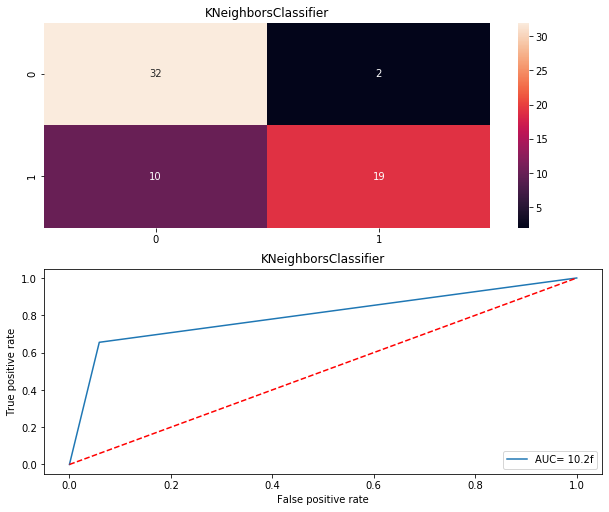

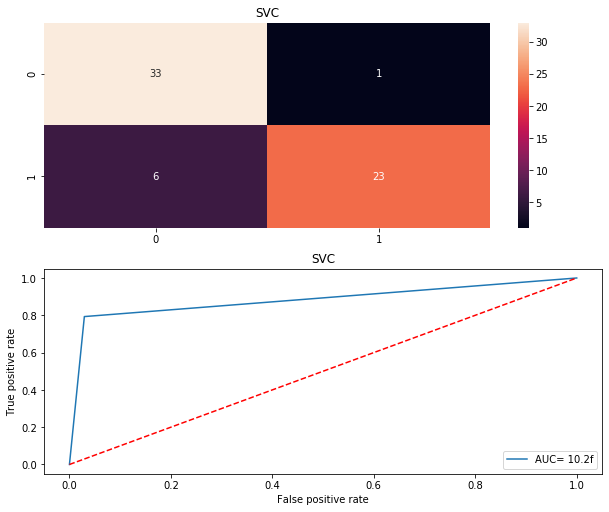

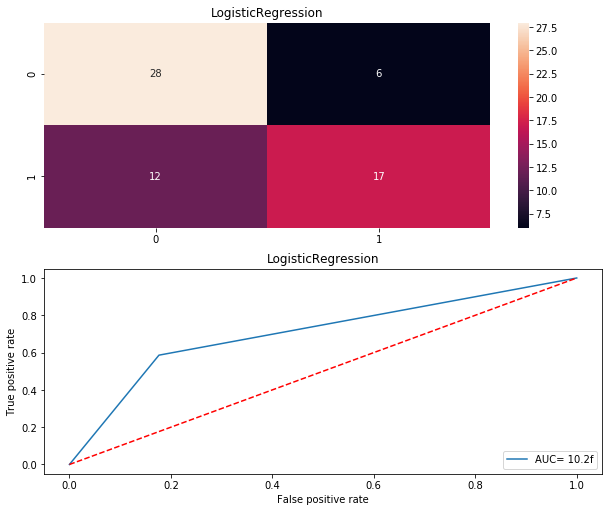

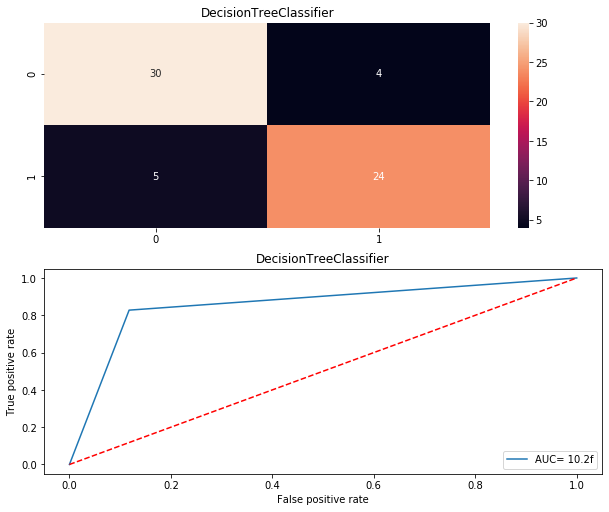

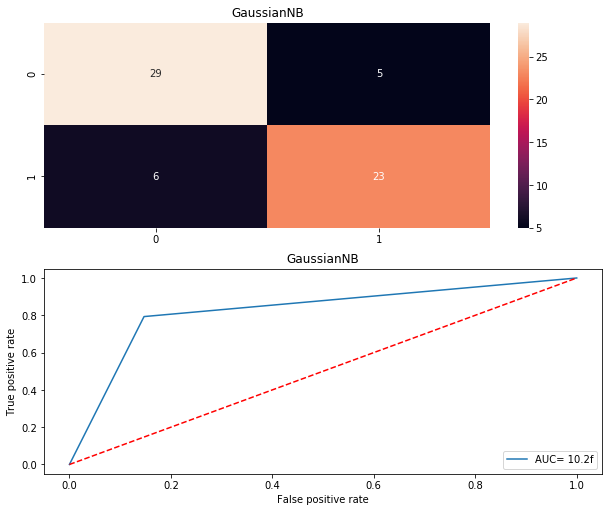

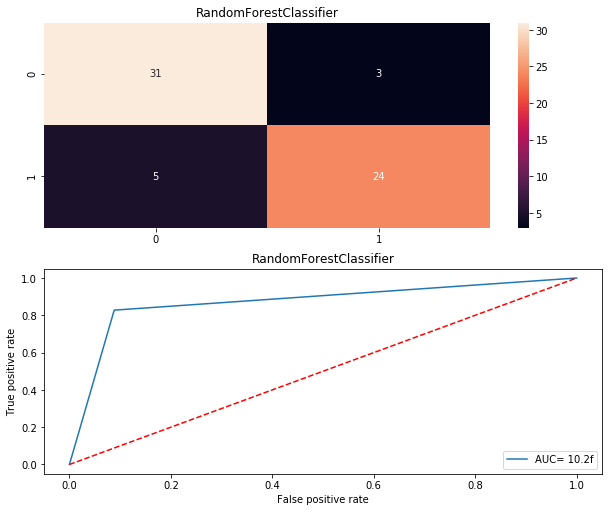

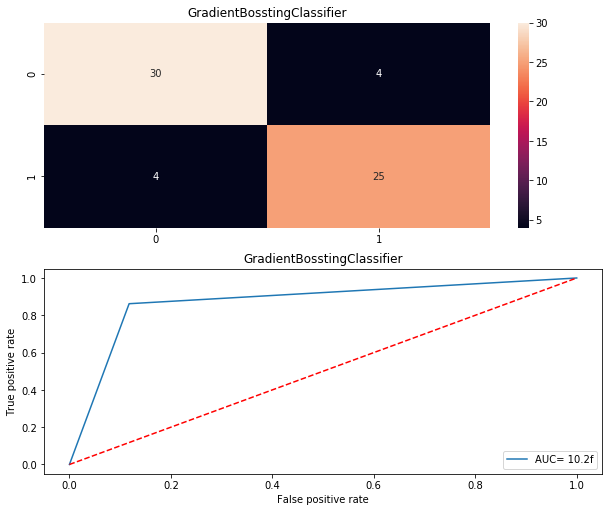

In [338]:
Model = []
score =[]
cvs = []
rocscore = []
for name,model in models:
    print ('""""""""""""""""""""""""""',name,'"""""""""""""""""""""""""""""')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,X,y,cv=10,scoring = 'accuracy').mean()
    
    print('cross_val_score=',sc)
    cvs.append(sc*100)
    
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    
    roc_auc = auc(false_positive_rate,true_positive_rate)
    
    print('roc_auc_score=',roc_auc)
    
    rocscore.append(roc_auc*100)
    
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pre))
    
    print('\n')
    
    cm = confusion_matrix(y_test,pre)
    
    print(cm)
    
    print('\n')
    
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    
    plt.title(name)
    
    print(sns.heatmap(cm,annot = True))
    
    plt.subplot(912)
    
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = 'AUC= 10.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    
    plt.legend(loc= 'lower right')
    plt.ylabel('True positive rate')
    
    plt.xlabel('False positive rate')
    
    print('\n\n')
    
    
    
    

In [339]:
result = pd.DataFrame({'Model': Model,'Accuracy Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,80.952381,58.904762,79.817444
1,SVC,88.888889,61.928571,88.184584
2,LogisticRegression,71.428571,66.261905,70.486815
3,DecisionTreeClassifier,85.714286,62.833333,85.496957
4,GaussianNB,82.539683,61.428571,82.302231
5,RandomForestClassifier,87.301587,66.380952,86.967546
6,GradientBosstingClassifier,87.301587,66.357143,87.221095


In [340]:
from sklearn.externals import joblib

In [341]:
joblib.dump(sv,'Sonar_predatasetauthentication.csv')


['Sonar_predatasetauthentication.csv']

In [342]:
model=joblib.load('Sonar_predatasetauthentication.csv')

model.predict(x_test)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0])